In [2]:
%load_ext autoreload

%autoreload 2
import sys
import numpy as np
import matplotlib.pyplot as plt
import see_fits
import scipy
from scipy.ndimage import gaussian_filter
sys.path.append('/pbs/throng/lsst/users/cpayerne/ClusterLikelihoods/modules/')
import abundance as cl_count
import covariance as covar
import mvp_pdf
import utils
import edit
import h5py
Omega_c_true = 0.30711 - 0.048254
Omega_b_true = 0.048254
sigma8_true = .8288
Omegam_true = 0.30711
True_value = [Omega_c_true + Omega_b_true, sigma8_true]

In [3]:
#datG = see_fits.mean_var_covar('/pbs/throng/lsst/users/cpayerne/ClusterLikelihoods_data/weights_old/Gaussian_4x4*')
#datP=see_fits.mean_var_covar('/pbs/throng/lsst/users/cpayerne/ClusterLikelihoods_data/weights_old/Poissonian_4x4*')
#datMPG=see_fits.mean_var_covar('/pbs/throng/lsst/users/cpayerne/ClusterLikelihoods_data/cosmological_constraints/MPG_20x30*')

In [4]:
binning=['100zx100m']
likelihood=['Poissonian','GaussianCholesky','MPG']
cosmology = {binning[i]:{likelihood_:None for likelihood_ in likelihood} for i in range(len(binning))}
for b in binning:
    try:
        cosmology[b]['Poissonian']=see_fits.mean_var_covar('/sps/lsst/users/cpayerne/1000xsimulations/analysis/'+b+'/mean_dispersion_fsky_div_10/Poissonian*')
        cosmology[b]['GaussianCholesky']  =see_fits.mean_var_covar('/sps/lsst/users/cpayerne/1000xsimulations/analysis/'+b+'/mean_dispersion_fsky_div_10/Gaussian*')
        cosmology[b]['MPG']       =see_fits.mean_var_covar('/sps/lsst/users/cpayerne/1000xsimulations/analysis/'+b+'/mean_dispersion_fsky_div_10/MPG*')
    except: 
        continue

# Forecast

In [1]:
forecastF=edit.load_pickle('/pbs/throng/lsst/users/cpayerne/ClusterLikelihoods_data/Covariances/Fisher_covariance.pickle')

NameError: name 'edit' is not defined

In [ ]:
errOm=forecast4x4['100zx100m']['Poissonian'].diagonal()**.5

In [41]:
errOm_partial = errOm * np.sqrt(10)

In [42]:
errOm_partial

array([0.00571373, 0.00339875])

# Mean

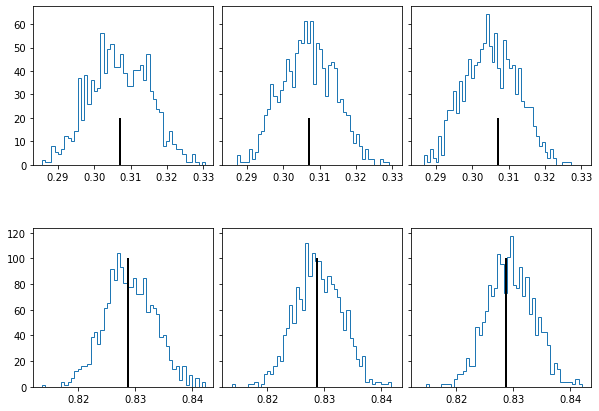

In [43]:
title = ['Poissonian', 'Gaussian', 'MPG']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c',]
n=11
maxsOm=20
maxss8=100
alpha=[.3, .6, .9]
fig, ax = plt.subplots(2, 3, figsize = (10,7), sharex='row', sharey='row')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.05, hspace=.4)
label = ['Poissonian', 'Gaussian', 'MPG']
show = [True, True, True]
b='100zx100m'
ls=['-','-','--']
for k in range(3):
    likelihood_ = likelihood[k]
    ax[0,k].vlines(True_value[0],0,maxsOm,ls='-',color='k',linewidth=2)
    ax[1,k].vlines(True_value[1],0,maxss8,ls='-', color='k',linewidth=2)
    x=np.array(cosmology[b][likelihood_]['Om'])#/np.std(cosmology[b][likelihood_]['Om'])-1
    y=np.array(cosmology[b][likelihood_]['s8'])#/np.std(cosmology[b][likelihood_]['s8'])-1
    #cov=np.cov(x,y)
    for s,x_ in enumerate([x,y]):
        hist,x_edges =np.histogram(x_, bins=50)
        x_middle=np.array([(x_edges[i]+x_edges[i+1])/2 for i in range(len(x_edges)-1)])
        y=gaussian_filter(hist, sigma=1.5)
        if s==0: 
            label=b
        else:label=None
        #ax[s,k].fill_between(x_middle,x_middle*0, y/scipy.integrate.simps(y,x_middle),
         #                    color=colors[k], alpha=alpha[i],edgecolor="k", label=b)
        #ax[s,k].plot(x_middle, y/scipy.integrate.simps(y,x_middle),
         #                    color=colors[i], alpha=1, label=b)
        ax[s,k].hist(x_, density=True, histtype='step', bins=50, color=colors[i])

    #except: continue

#plt.savefig('best_fit_error_distribution.pdf', bbox_inches='tight', dpi=300)

# Standard deviation

Poissonian
100zx100m
GaussianCholesky
100zx100m
MPG
100zx100m


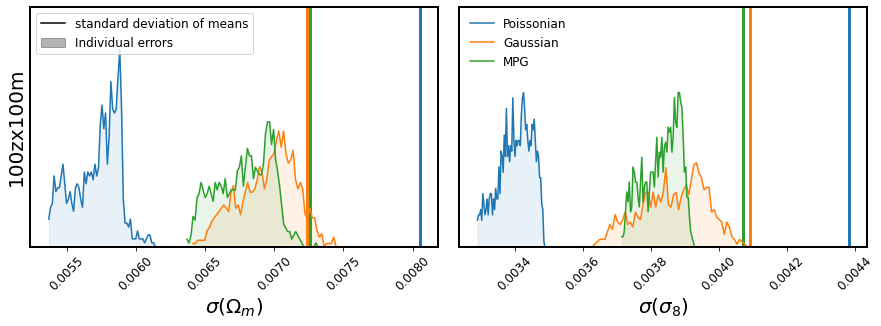

In [71]:
title = ['Poissonian', 'Gaussian', 'MPG']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c',]
n=11
maxsOm=5000
maxss8=15000
alpha=[.3, .6, .9]
plt.rcParams['axes.linewidth']= 2
fig, ax = plt.subplots(3, 2, figsize = (15,15))
fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])
fig.delaxes(ax[2,0])
fig.delaxes(ax[2,1])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.05, hspace=.2)
label = ['Poissonian', 'Gaussian', 'MPG']
show = [True, True, True]
ls=['-','-','--']
for i, b in enumerate(binning):
    for k in range(3):
        likelihood_=likelihood[k]
        print(likelihood_)
        print(b)
        err_norm=1e-3
                #try:
        if k < 2:
            fOm=forecast4x4[b][title[k]][0,0]**.5 * np.sqrt(10)#/np.std(cosmology[b][likelihood_]['Om'])-1
            #ax[i,0].vlines(fOm,0,maxsOm,ls='--', color=colors[k],alpha=1,linewidth=3)
            fs8=forecast4x4[b][title[k]][1,1]**.5* np.sqrt(10)#/np.std(cosmology[b][likelihood_]['Om'])-1
            #ax[i,1].vlines(fs8,0,maxss8,ls='--', color=colors[k],alpha=1,linewidth=3)
        try:
            x=np.array(cosmology[b][likelihood[k]]['cov'][:,0,0]**.5)#/np.std(cosmology[b][likelihood_]['Om'])-1
            y=np.array(cosmology[b][likelihood[k]]['cov'][:,1,1]**.5)#/np.std(cosmology[b][likelihood_]['Om'])-1
            err_Om = utils.weightedvar(cosmology[b][likelihood_]['Om'], w=None)**.5
            err_s8 = utils.weightedvar(cosmology[b][likelihood_]['s8'], w=None)**.5

            ax[i,0].vlines(err_Om,0,maxsOm,ls='-',color=colors[k],alpha=1,linewidth=3)
            ax[i,1].vlines(err_s8,0,maxss8,ls='-', color=colors[k],alpha=1,linewidth=3)

    
            x_=[x,y]
            for s, x in enumerate(x_):
                hist,x_edges =np.histogram(x, bins=70)
                x_middle=np.array([(x_edges[i]+x_edges[i+1])/2 for i in range(len(x_edges)-1)])
                y=gaussian_filter(hist, sigma=.5)
                #ax[i,s].hist(x, bins=100,color=colors[k], alpha=.4, density=True)
                ax[i,s].fill_between(x_middle,x_middle*0, y/scipy.integrate.simps(y,x_middle),
                                     color=colors[k], alpha=.1)
                ax[i,s].plot(x_middle,y/scipy.integrate.simps(y,x_middle), alpha=1,color=colors[k])
        except:a=1
        

    #except: continue
ax[0,0].fill_between([], [], 0*[], color='k', alpha=.3, label='Individual errors')
#ax[0,0].plot([], [], '--k', label='Fisher Forecast')
ax[0,0].plot([], [], '-k', label='standard deviation of means')
for i in range(3):
    ax[0,1].plot([], [], colors[i], label=title[i])
for i in range(1):
    ax[i,0].set_ylabel(binning[i], fontsize=20)
    for j in range(2):
            
            #ax[i].set_title(title[j], fontsize=20)
            ax[0,0].set_xlabel(r'$\sigma(\Omega_m)$', fontsize = 20)
            ax[0,1].set_xlabel(r'$\sigma(\sigma_8)$', fontsize = 20)
            ax[i,0].set_ylim(0,maxsOm)
            ax[i,1].set_ylim(0,maxss8)
            ax[i,j].tick_params(axis='x', rotation=45, labelsize=12)
            ax[i,j].set_yticks([], minor=False)
ax[0,0].legend(frameon=True, fontsize=12, loc='upper left')
ax[0,1].legend(frameon=False, fontsize=12, loc='upper left')
plt.savefig('best_fit_error_distribution_partial.pdf', bbox_inches='tight', dpi=300)